# **Telco Customer Churn Prediction**
by: Rizki Dinata

## Data Fields
---
| Features         | Type Data | Description                                                |
|------------------|-----------|------------------------------------------------------------|
| state | string | 2-letter code of the US state of customer residence |
| account_length | numerical. | Number of months the customer has been with the current telco provider |
|  area_code | string | "area_code_AAA" where AAA = 3 digit area code. |
|  international_plan | (yes/no). |  The customer has international plan. |
|  voice_mail_plan | (yes/no). |  The customer has voice mail plan. |
|  number_vmail_messages | numerical |  Number of voice-mail messages. |
|  total_day_minutes | numerical |  Total minutes of day calls. |
|  total_day_calls | numerical |  Total number of day calls. |
|  total_day_charge | numerical |  Total charge of day calls. |
|  total_eve_minutes | numerical |  Total minutes of evening calls. |
|  total_eve_calls | numerical |  Total number of evening calls. |
|  total_eve_charge | numerical |  Total charge of evening calls. |
|  total_night_minutes | numerical |  Total minutes of night calls. |
|  total_night_calls | numerical |  Total number of night calls. |
|  total_night_charge | numerical |  Total charge of night calls. |
|  total_intl_minutes | numerical |  Total minutes of international calls. |
|  total_intl_calls | numerical |  Total number of international calls. |
|  total_intl_charge | numerical |  Total charge of international calls |
|  number_customer_service_calls | numerical |  Number of calls to customer service |
|  number_customer_service_calls | numerical |  Number of calls to customer service |
|  churn | (yes/no) | Customer churn - target variable. |



# Import Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install lazypredict

In [3]:
#Library statistic
import numpy as np
import pandas as pd

#library visualization
import seaborn as sns
import matplotlib.pyplot as plt

#library ML
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from lazypredict.Supervised import LazyClassifier
from sklearn import metrics

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

import os
import warnings

In [4]:
warnings.warn('ignore')

In [5]:
os.chdir('/content/drive/MyDrive/FGAbinar DS/challenge2')

In [6]:
!pwd

/content/drive/MyDrive/FGAbinar DS/challenge2


# Load Datasets

In [7]:
df_train = pd.read_csv('Train.csv', index_col=False)
df_test = pd.read_csv('Test.csv', index_col=False)

In [8]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.60,123,27.47,195.50,103,16.62,254.40,103,11.45,13.70,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.40,114,41.38,121.20,110,10.30,162.60,104,7.32,12.20,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.40,71,50.90,61.90,88,5.26,196.90,89,8.86,6.60,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.70,113,28.34,148.30,122,12.61,186.90,121,8.41,10.10,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.20,88,37.09,348.50,108,29.62,212.60,118,9.57,7.50,7,2.03,3,no


In [9]:
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.10,110,45.07,197.40,99,16.78,244.70,91,11.01,10.00,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.40,98,37.98,220.60,101,18.75,203.90,118,9.18,6.30,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.70,70,20.52,307.20,76,26.11,203.00,99,9.14,13.10,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.70,114,32.42,218.20,111,18.55,129.60,121,5.83,8.10,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.30,76,21.13,277.10,112,23.55,250.70,115,11.28,15.50,5,4.19,3


In [10]:
print(f'The train dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns')

The train dataset has 4250 rows and 20 columns


In [11]:
print(f'The test dataset has {df_test.shape[0]} rows and {df_test.shape[1]} columns')

The test dataset has 750 rows and 20 columns


In [12]:
#Function summary data

def summarize_data(df):
  #type data
  summary = pd.DataFrame(df.dtypes, columns = ['DTypes'])
  summary.reset_index()
  #missing value and count unique
  summary['Missing'] = df.isna().sum().values
  #count unique
  summary['Unique_value'] = df.nunique().values

  return summary

In [13]:
summarize_data(df_train)

,DTypes,Missing,Unique_value
state,object,0,51
account_length,int64,0,215
area_code,object,0,3
international_plan,object,0,2
voice_mail_plan,object,0,2
number_vmail_messages,int64,0,46
total_day_minutes,float64,0,1843
total_day_calls,int64,0,120
total_day_charge,float64,0,1843
total_eve_minutes,float64,0,1773


In [14]:
summarize_data(df_test)

,DTypes,Missing,Unique_value
id,int64,0,750
state,object,0,51
account_length,int64,0,175
area_code,object,0,3
international_plan,object,0,2
voice_mail_plan,object,0,2
number_vmail_messages,int64,0,39
total_day_minutes,float64,0,619
total_day_calls,int64,0,100
total_day_charge,float64,0,619


Datasets haven't missing value and duplicate

# **Exploratory Data Analysis**

In [15]:
#view data with object type
cathegorical = list(df_train.select_dtypes(include='object').columns)
cathegorical

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [16]:
#view data with int64 and float type
numerical = list(df_train.select_dtypes(include=['float64','int64']).columns)
numerical

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

## Percenatage Class churn

In [17]:
#Define Pie chart function

def pie_chart(column,title):
    #Calcuate percentage
    count = df_train[column].value_counts()
    percent = count / count.sum()

    #plot the chart
    plt.figure(figsize=(6,6))
    plt.pie(percent, labels=percent.index, autopct='%.1f%%', startangle=90, shadow=True, colors=sns.color_palette('Set2'))
    plt.title(title)
    # plt.axis('equal')
    plt.show()

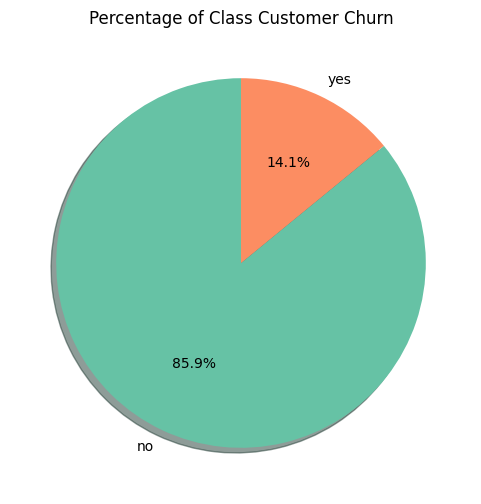

In [18]:
#Plot the data using chart function
pie_chart('churn', 'Percentage of Class Customer Churn')

Mostly customer still continue with this service round 85% customer still continue. There are 14% customer churn. In order to improve higher profit, we use train data to predict customer will churn in the future. We can use machine learning algorithm for testing test dataset.

## Distribution data histplot

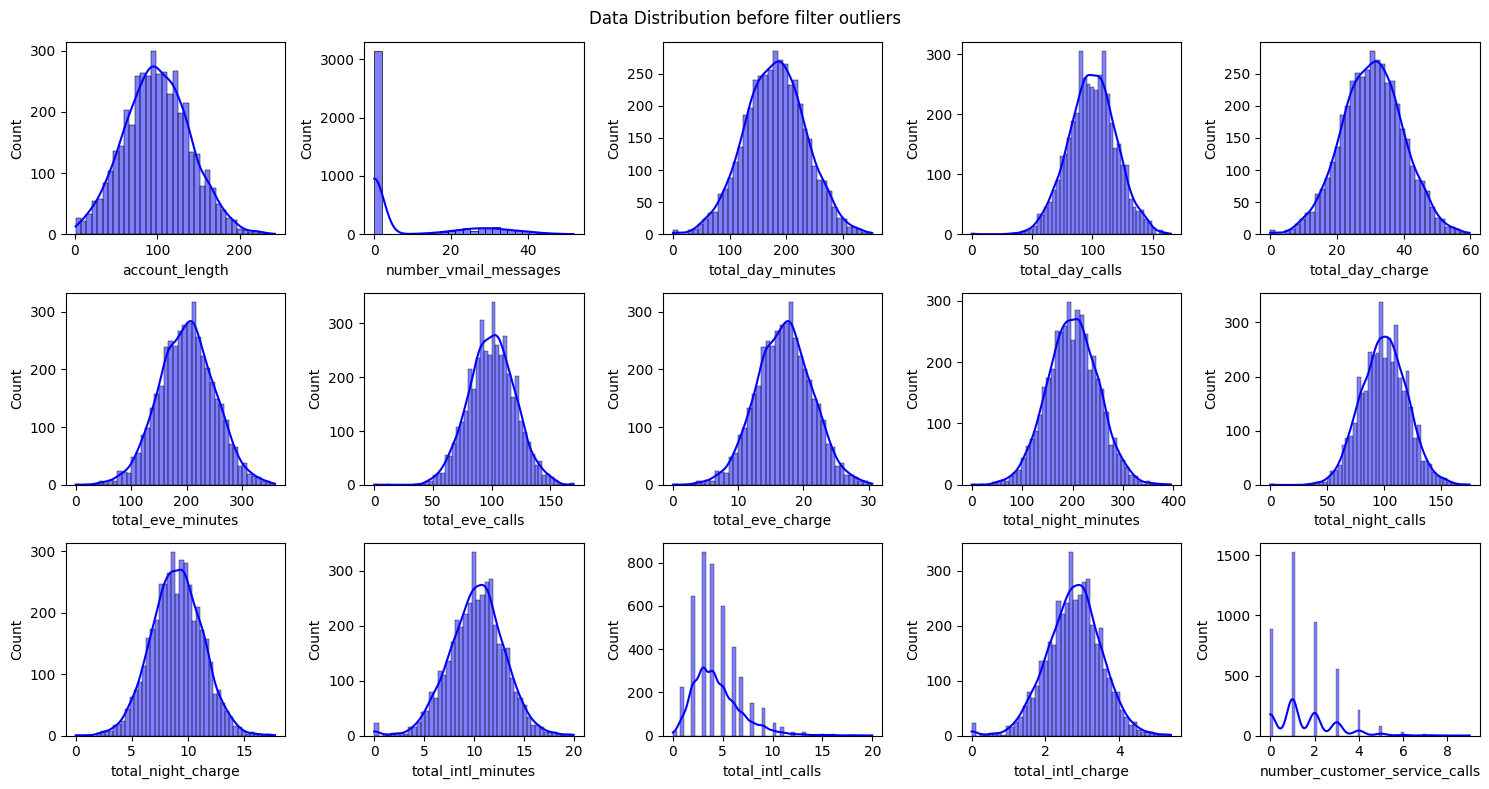

In [19]:
#display data distrbution with histplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical):
    plt.subplot(3, 5, i+1)
    sns.histplot(df_train[col], color='blue', kde=True)

plt.suptitle('Data Distribution before filter outliers')
plt.tight_layout()
plt.show()

As we can see that mostly features close to normal distribution. This histogram plot explain that our features have round of mean.\
Mostly Customer use this service is account around with 100 length. Which is that customer use this service for long time.

## Total customer with company service

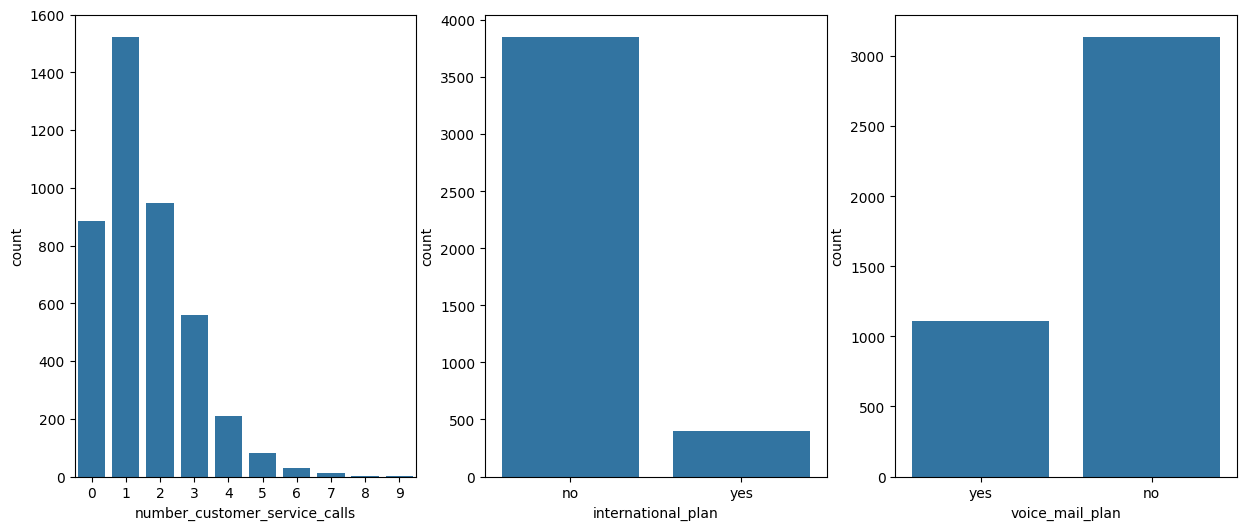

In [20]:
#Display total customer with company service
fig, axes = plt.subplots(figsize=(15,6), nrows=1, ncols=3, sharey=False)

sns.countplot(data=df_train, x="number_customer_service_calls", ax=axes[0])
sns.countplot(data=df_train, x="international_plan", ax=axes[1])
sns.countplot(data=df_train, x="voice_mail_plan", ax=axes[2]);

Mostly customer subsribe this service with no international plan and no voice mail plan. Total customer with international plan is close to 500 while those who are not use international plan around 3800.\
Customer with voice mail plan more than 1000 and those who are not is more than 3000.\
From these graph. we get know that most customer not use international plan and voice mail plan. This plan service related with total charge, so we have to consider with it.

## Total customer by area code

<Axes: xlabel='area_code', ylabel='count'>

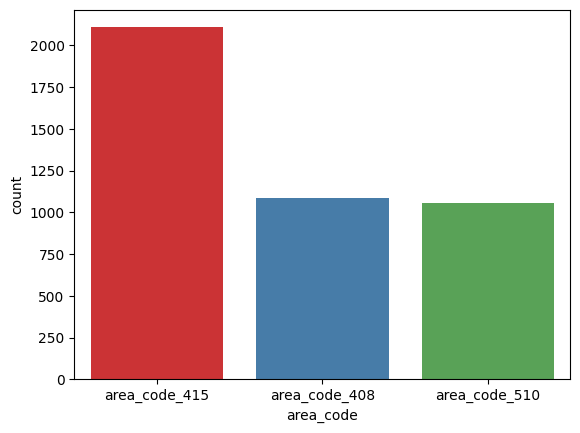

In [21]:
#display total customer by area code
sns.countplot(data=df_train, x='area_code', palette='Set1')

This graph show us that highest total customer use this service is area code 415 is more than 2000. While total customer in area code 408 and 510 is around 1000. But each area code used by several cities and each city spread in several states. This code important for telco company to easier telco management and phone number policies

## Total customer by state

<Axes: xlabel='state', ylabel='count'>

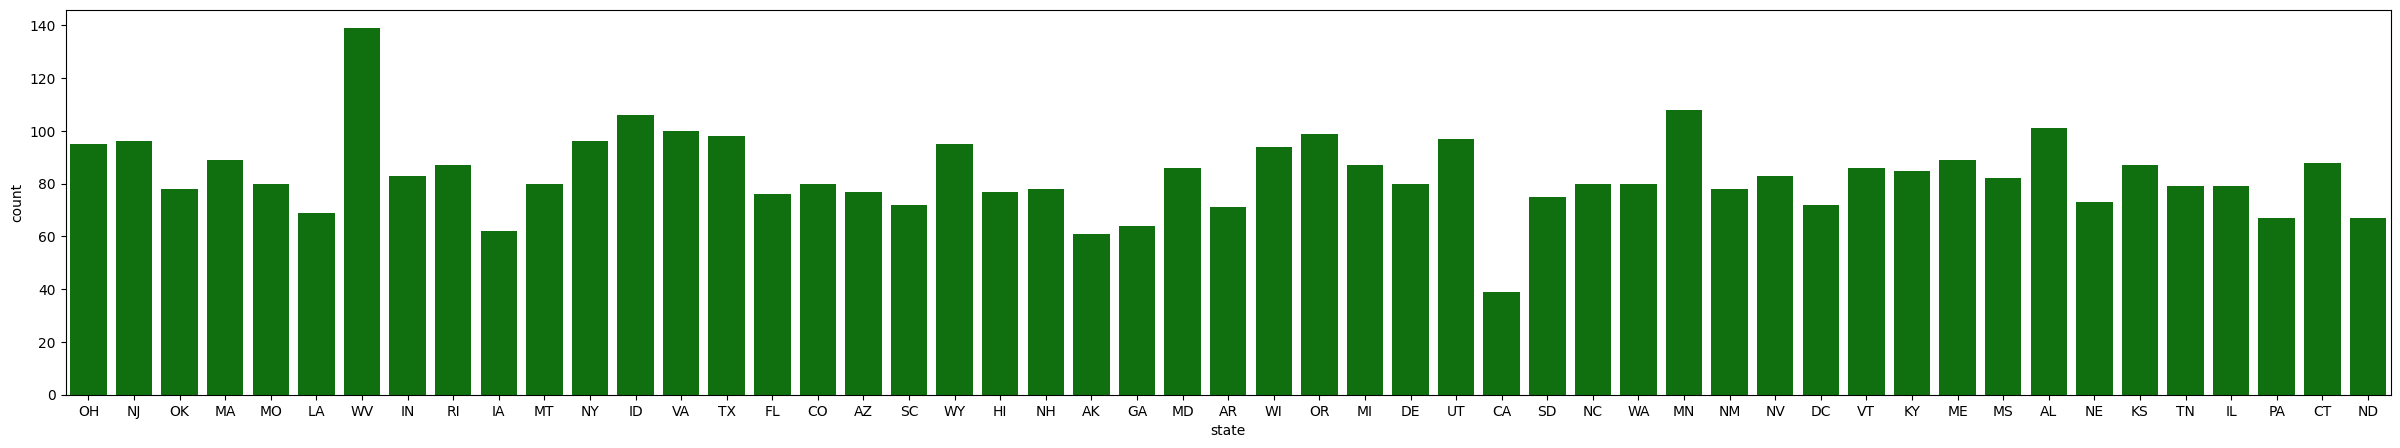

In [22]:
#display total customer by state
plt.figure(figsize=(30,5))
sns.countplot(data=df_train, x='state', color='green')

This graph show that state has the highest total customers is WV (West Virginia) and state has the lowest customers is CA (California)

## Data distribution and churn

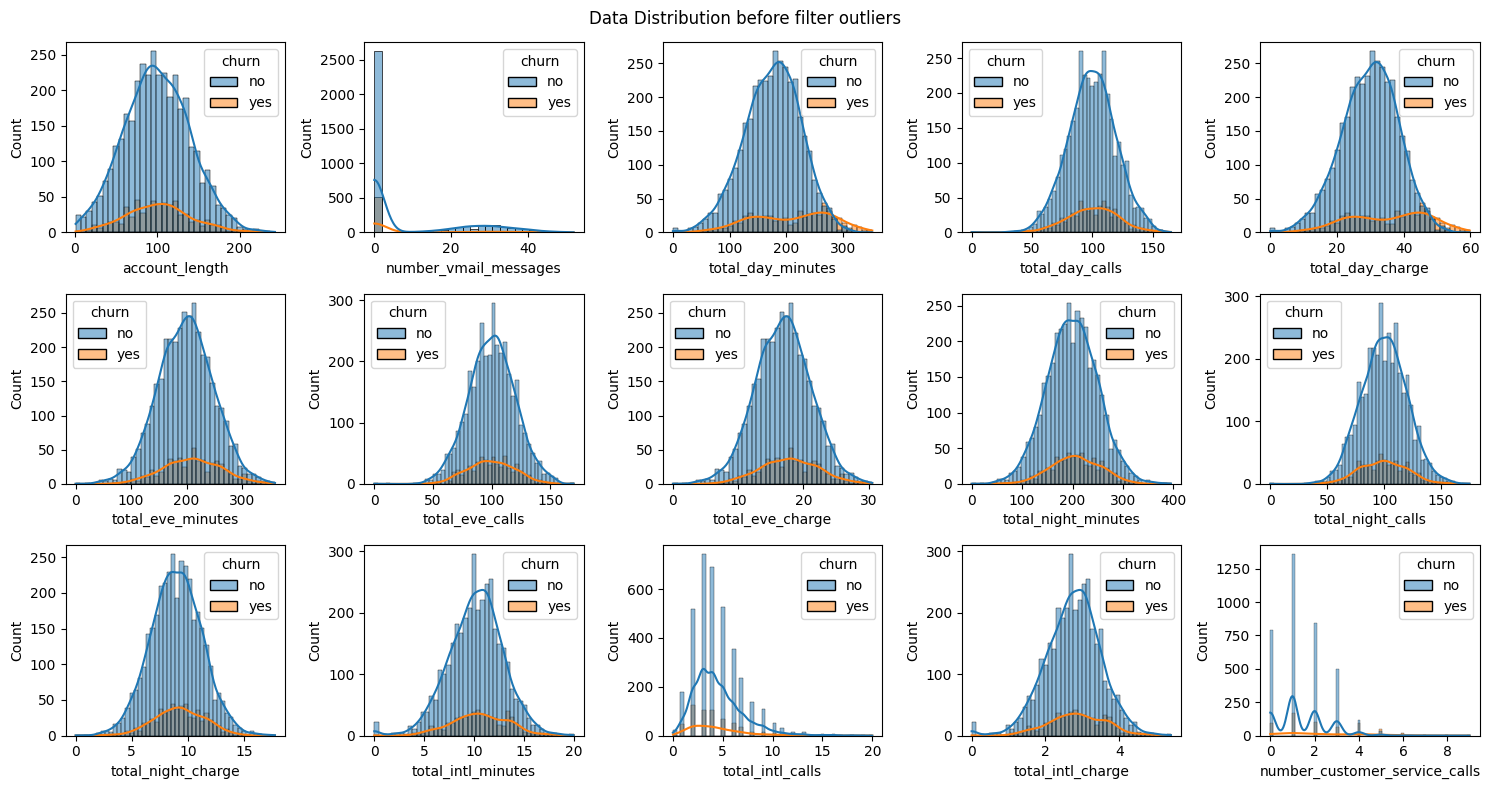

In [23]:
#display data distribution with hue churn
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical):
    plt.subplot(3, 5, i+1)
    sns.histplot(data=df_train, x=col, color='blue',hue='churn', kde=True)

plt.suptitle('Data Distribution before filter outliers')
plt.tight_layout()
plt.show()

## Service and churn

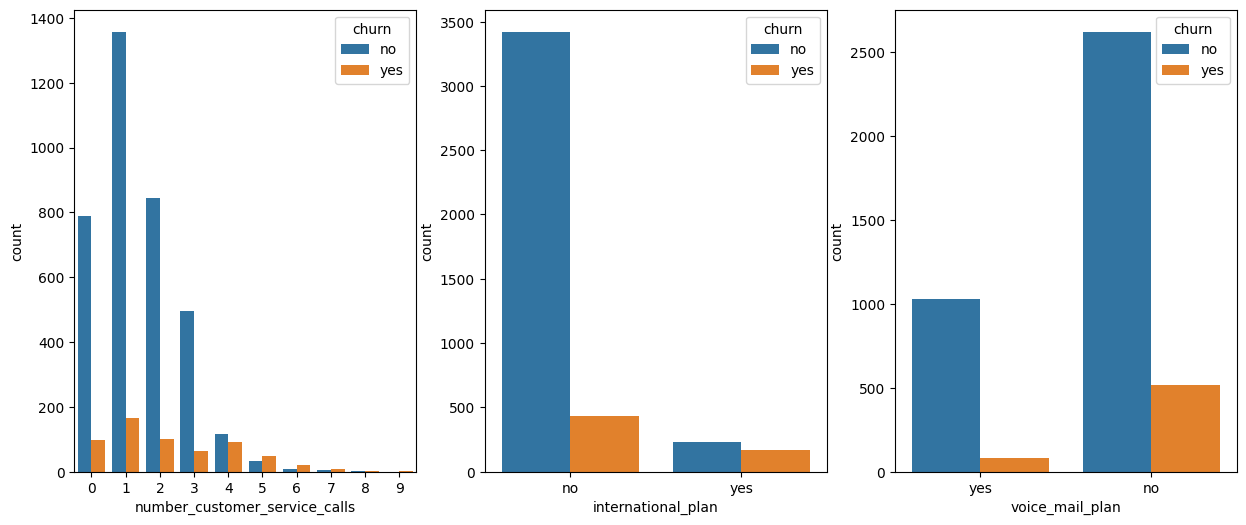

In [24]:
#display plot service and churn
fig, axes = plt.subplots(figsize=(15,6), nrows=1, ncols=3, sharey=False)

sns.countplot(data=df_train, x="number_customer_service_calls", hue="churn", ax=axes[0])
sns.countplot(data=df_train, x="international_plan", hue="churn", ax=axes[1])
sns.countplot(data=df_train, x="voice_mail_plan", hue="churn", ax=axes[2]);

On CS 5, CS 6, and CS 7 total customer churn is higher from total customer no  churn. Which need to validation with other features what causes increase customer churn.
In international plan subscription, total customer churn almost equaled to customer no churn. This can be decrease profit.
In voice mail plan subcsription, total customer no churn still high.



## Area code and churn

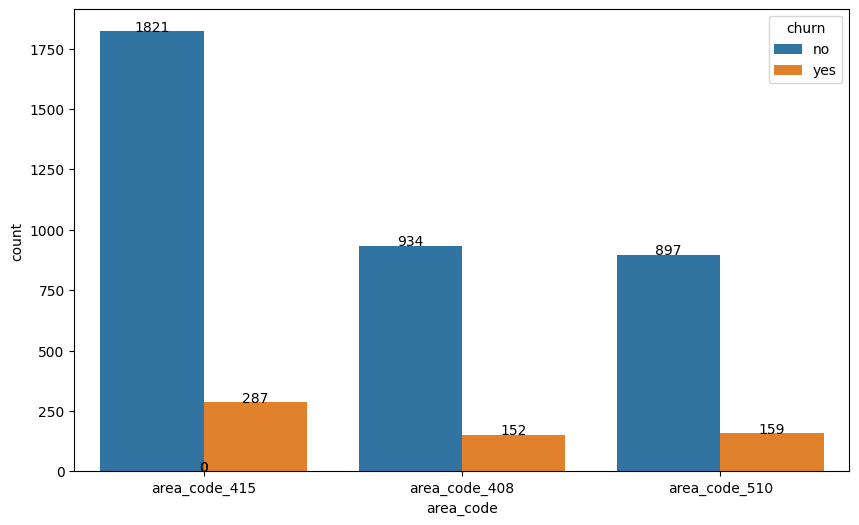

In [25]:
#display area code and churn
fig, ax1 = plt.subplots(figsize=(10, 6))
graph = sns.countplot(data=df_train, x='area_code', hue='churn')
for p in graph.patches:
    height = p.get_height()
    ax1.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height + 0.1), ha='center')

This graph show that the highest customer churn is area code 415 is more than 250. While another area code is less than 250

## State and churn

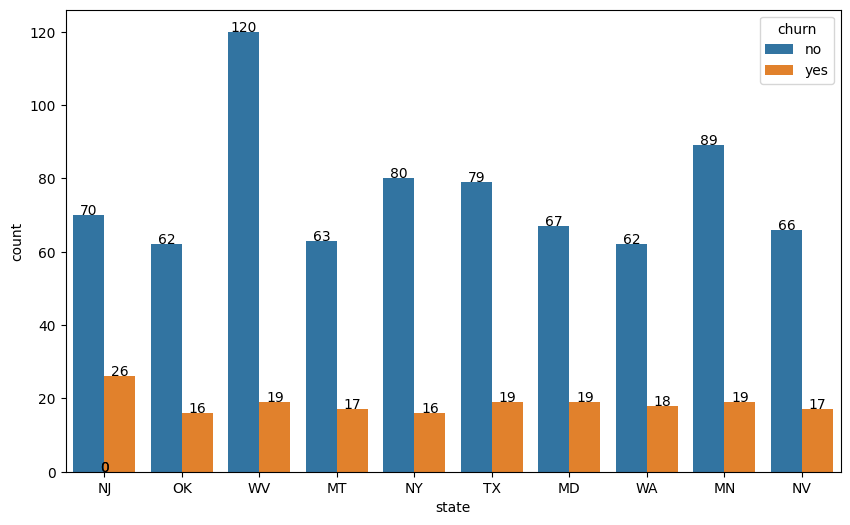

In [26]:
#display state and churn
#define churn
df_churn = df_train[df_train['churn'] == 'yes']

#Find index that 5 states highest churn
top_5_states = df_churn['state'].value_counts().nlargest(10).index

#data state with churn
df_top_states = df_train[df_train['state'].isin(top_5_states)]

#plot churn by state
fig, ax1 = plt.subplots(figsize=(10, 6))
graph = sns.countplot(data=df_top_states, x='state', hue='churn')
for p in graph.patches:
    height = p.get_height()
    ax1.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height + 0.1), ha='center')

This graph is sorted from the highest Customer churn and there are 10 states have the highest churn. NJ (New Jersey) has the highest churn rate from all of these states with a value more than 20. While another states have less than 20  

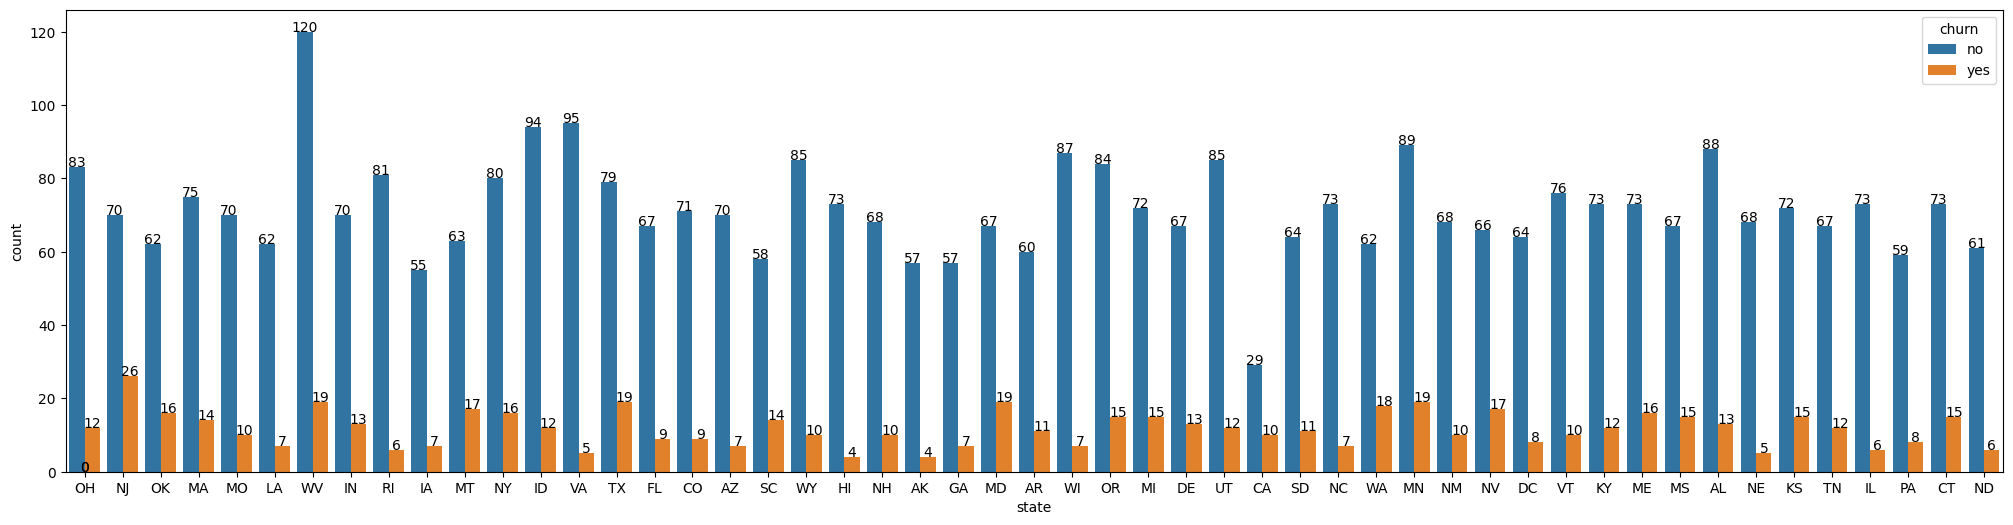

In [27]:
fig, ax1 = plt.subplots(figsize=(25, 6))
graph = sns.countplot(data=df_train, x='state', hue='churn')
for p in graph.patches:
    height = p.get_height()
    ax1.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height + 0.1), ha='center')

# Preprocessing

## Check Data Outliers

In [28]:
#Define function detect outlier

def detect_outlier(df:pd.DataFrame, feature):

      Q1 = df[feature].quantile(0.25)
      Q3 = df[feature].quantile(0.75)
      IQR = Q3 - Q1

      low_limit = Q1 - (IQR*1.5)
      high_limit = Q3 + (IQR*1.5)
      return print(f'Total outliers in {feature} : {len(df[(df[feature] < low_limit) | (df[feature] > high_limit)])}')

def filter_outlier(df):
    no = ['number_vmail_messages','number_customer_service_calls', 'total_intl_calls']
    feature = list(df.select_dtypes(include=['int64','float']).drop(no, axis=1).columns)
    outliers_removed = np.array([True] * len(df))

    print(f'Data before outliers removed: {len(df)}')

    for col in feature :
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1

      low_limit = Q1 - (IQR*1.5)
      high_limit = Q3 + (IQR*1.5)
      outliers_removed = ((df[col] >= low_limit) & (df[col] <= high_limit)) & outliers_removed

    df = df[outliers_removed]
    print(f'Data after outliers removed: {len(df)}')

    return df

We can detect data outliers with function detect_outlier

In [29]:
detect_outlier(df_train,'number_vmail_messages')

Total outliers in number_vmail_messages : 86


we will filter data outliers to improve machine learning algorithm. There are 256 outliers removed

In [30]:
df_tr_ro = df_train.copy()
df_tr_ro = filter_outlier(df_tr_ro)

Data before outliers removed: 4250
Data after outliers removed: 3994


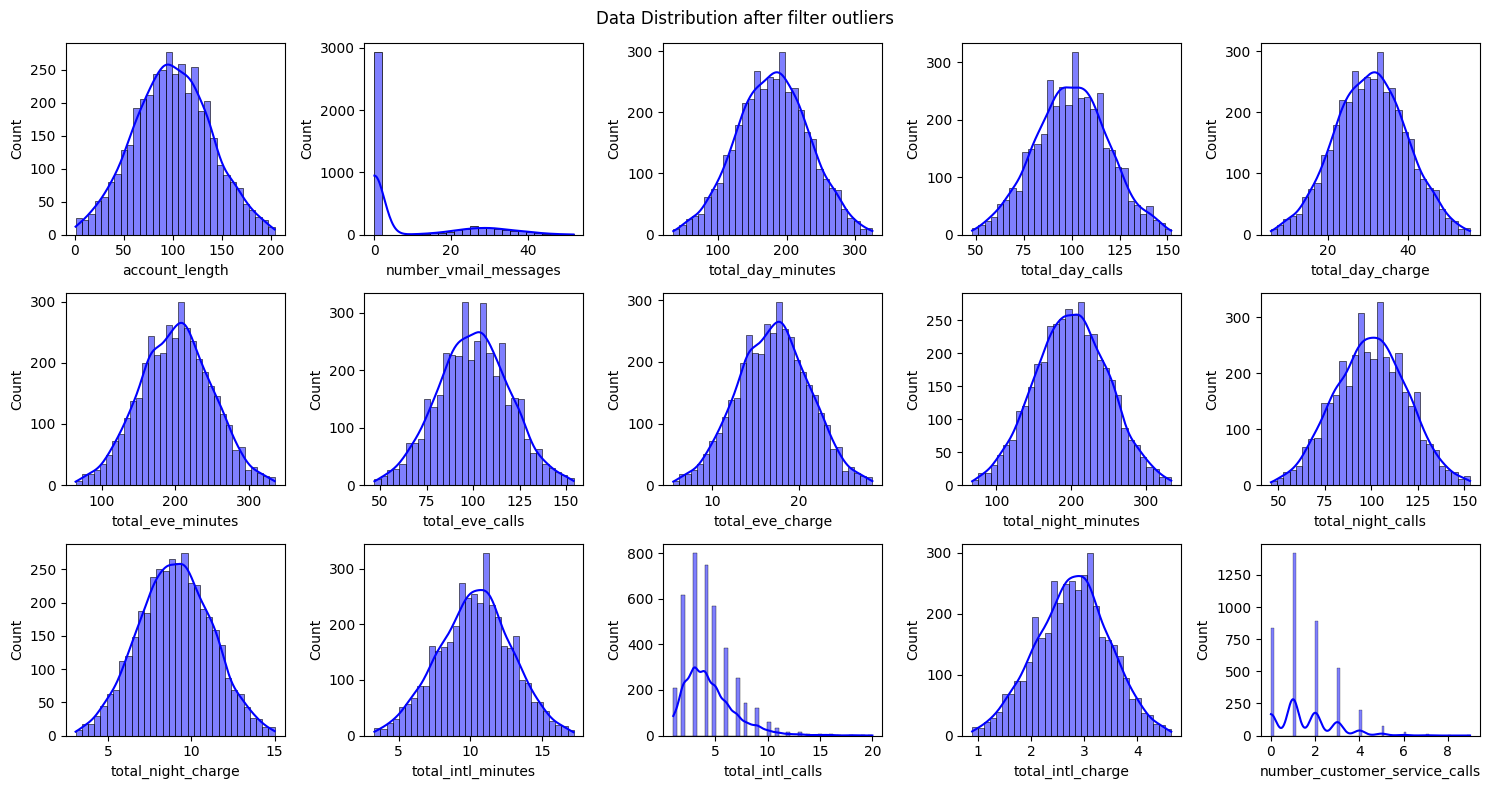

In [31]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical):
    plt.subplot(3, 5, i+1)
    sns.histplot(df_tr_ro[col], color='blue', kde=True)

plt.suptitle('Data Distribution after filter outliers')
plt.tight_layout()
plt.show()

Dealing with outliers, we have to adjust based on bussiness we need. There are 3 ways to dealing with outliers, remove outliers, change outlier values with revalidation, and keep the outliers. In this project, we remove outliers but not all features such as number_vmail_messages and number_customer_service. This outliers must be maintained because this coutliers need to improve algorithm without missing prediction.

## Feature Encoding
In this step, we will change cathegorical data into numerical using encoder

In [32]:
def encoding_data_train(df:pd.DataFrame):
  #One Hot Encoding to area code
  ohe = OneHotEncoder()
  x = ohe.fit_transform(df_train[['area_code']]).toarray()
  df_ohe = pd.DataFrame(x, columns=[f'is_{i}' for i in ohe.categories_[0]])

  #Label encoding
  df_label_encode = df_train.copy()
  for column in ['international_plan', 'voice_mail_plan', 'churn'] :
    label_encode= {'no' : 0,'yes': 1}
    df_label_encode[column] = df_label_encode[column].map(label_encode)

  #remove column of area code before encoding and remove state
  df = pd.concat([df_ohe, df_label_encode], axis=1).drop(['area_code','state'], axis=1)

  return df

In [33]:
df_cl_train = encoding_data_train(df_train)
df_cl_train.head()

,is_area_code_408,is_area_code_415,is_area_code_510,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.00,1.00,0.00,107,0,1,26,161.60,123,27.47,...,103,16.62,254.40,103,11.45,13.70,3,3.70,1,0
1,0.00,1.00,0.00,137,0,0,0,243.40,114,41.38,...,110,10.30,162.60,104,7.32,12.20,5,3.29,0,0
2,1.00,0.00,0.00,84,1,0,0,299.40,71,50.90,...,88,5.26,196.90,89,8.86,6.60,7,1.78,2,0
3,0.00,1.00,0.00,75,1,0,0,166.70,113,28.34,...,122,12.61,186.90,121,8.41,10.10,3,2.73,3,0
4,0.00,0.00,1.00,121,0,1,24,218.20,88,37.09,...,108,29.62,212.60,118,9.57,7.50,7,2.03,3,0


In [34]:
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.10,110,45.07,197.40,99,16.78,244.70,91,11.01,10.00,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.40,98,37.98,220.60,101,18.75,203.90,118,9.18,6.30,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.70,70,20.52,307.20,76,26.11,203.00,99,9.14,13.10,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.70,114,32.42,218.20,111,18.55,129.60,121,5.83,8.10,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.30,76,21.13,277.10,112,23.55,250.70,115,11.28,15.50,5,4.19,3


In [35]:
def encoding_data_test(df:pd.DataFrame):
  #One Hot Encoding to area code
  ohe = OneHotEncoder()
  x = ohe.fit_transform(df_test[['area_code']]).toarray()
  df_ohe = pd.DataFrame(x, columns=[f'is_{i}' for i in ohe.categories_[0]])

  #Label encoding
  df_label_encode = df_test.copy()
  for column in ['international_plan', 'voice_mail_plan'] :
    label_encode= {'no' : 0,'yes': 1}
    df_label_encode[column] = df_label_encode[column].map(label_encode)

  df = pd.concat([df_ohe, df_label_encode], axis=1).drop(['area_code','state', 'id'], axis=1)

  return df

In [36]:
df_cl_test = encoding_data_test(df_test)
df_cl_test.head()

,is_area_code_408,is_area_code_415,is_area_code_510,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.00,1.00,0.00,128,0,1,25,265.10,110,45.07,197.40,99,16.78,244.70,91,11.01,10.00,3,2.70,1
1,0.00,0.00,1.00,118,1,0,0,223.40,98,37.98,220.60,101,18.75,203.90,118,9.18,6.30,6,1.70,0
2,0.00,1.00,0.00,62,0,0,0,120.70,70,20.52,307.20,76,26.11,203.00,99,9.14,13.10,6,3.54,4
3,0.00,0.00,1.00,93,0,0,0,190.70,114,32.42,218.20,111,18.55,129.60,121,5.83,8.10,3,2.19,3
4,0.00,1.00,0.00,174,0,0,0,124.30,76,21.13,277.10,112,23.55,250.70,115,11.28,15.50,5,4.19,3


## Correlation Features

<Axes: >

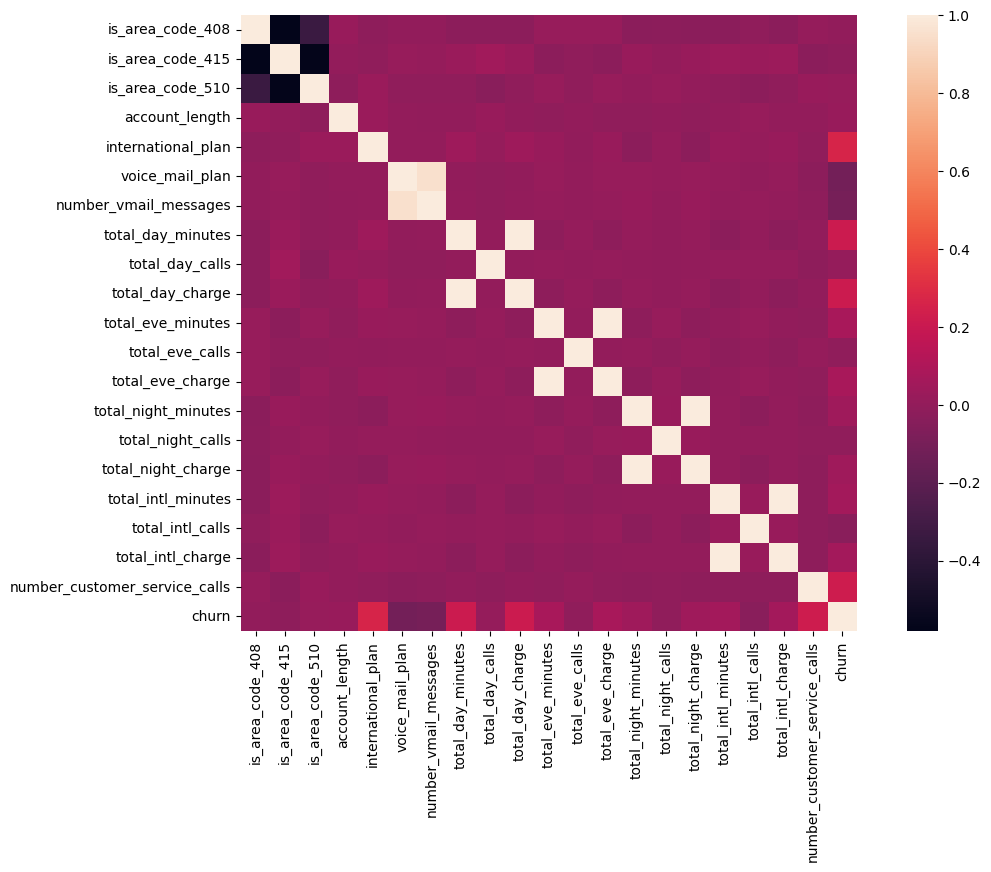

In [37]:
#Display correlation feature
plt.figure(figsize=(13,8))
sns.heatmap(df_cl_train.corr(), square=True)

There are perfect correlation (1) outside of diagonal such as total_eve_minutes and total_eve_charge. This make sense because the cost related with total minutes which is used by customer.
In this confusion matrix, customer churn related (positive correlation) with international plan, total day minutes, total day charge. Meanwhile customer churn related (negative correlation) with voice mail plan and number vmail.

# **Modeling**

## Split data train into train and validation
In this project we use SMOTE oversampling to imbalanced class in the class churn. We use normalization (minmax scaler) to reset data so that the data not redundant.

In [38]:
#define target in data train
data_train = df_cl_train.drop('churn', axis=1)
target = df_cl_train['churn']

X_train, X_valid, y_train, y_valid = train_test_split(data_train, target, test_size = 0.2, random_state = 44, stratify=target)

#Normalization
norm = MinMaxScaler()
X_train_s = norm.fit_transform(X_train)

X_valid_s = norm.transform(X_valid)

#SMOTE for imbalanced class

sm = SMOTE(random_state=44)
X_train_sm, y_train_sm = sm.fit_resample(X_train_s, y_train)
# X_train_sm, y_train_sm = X_train_s, y_train

print(X_train_sm.shape, X_valid_s.shape, y_train_sm.shape, y_valid.shape)

(5844, 20) (850, 20) (5844,) (850,)


## Using lazypredict library to evaluate models

In [39]:
#for this classification we use LazyClassifier module to choose best performance model

clf_lazy = LazyClassifier(verbose=0, predictions=True, ignore_warnings=True, random_state=44)
models, predictions = clf_lazy.fit(X_train_sm, X_valid_s, y_train_sm, y_valid)
models

 97%|█████████▋| 28/29 [00:14<00:00,  2.82it/s]

[LightGBM] [Info] Number of positive: 2922, number of negative: 2922
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3831
[LightGBM] [Info] Number of data points in the train set: 5844, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:14<00:00,  1.98it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.96,0.90,0.90,0.96,0.33
XGBClassifier,0.95,0.89,0.89,0.95,0.31
RandomForestClassifier,0.94,0.87,0.87,0.94,1.30
BaggingClassifier,0.93,0.87,0.87,0.93,0.53
ExtraTreesClassifier,0.92,0.83,0.83,0.92,0.78
DecisionTreeClassifier,0.88,0.83,0.83,0.89,0.17
NuSVC,0.86,0.81,0.81,0.87,1.49
SVC,0.88,0.81,0.81,0.89,0.88
CalibratedClassifierCV,0.79,0.76,0.76,0.81,2.45


We use library LazyClassifier to training dataset with several algorithm. As we can see that LGBM Classifer has 96% accuracy and 96% f1-score. So we decide to choose LGBM algorithm in this project

In [40]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(verbose=0)
clf.fit(X_train_sm, y_train_sm)

LGBMClassifier(verbose=0)

In [41]:
#using cross validation score
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=44)

val_score = cross_val_score(clf, X_train_sm, y_train_sm, cv=skfold, scoring='accuracy')
print(f'Mean score cross val using LGBMClassifier is {val_score.mean()*100 : .2f}%')

Mean score cross val using LGBMClassifier is  97.07%


In [42]:
#prediction using data valid
y_pred_valid = clf.predict(X_valid_s)

The accuracy score :  95.53%
The f1_score :  83.76%
The recall score:  81.67%
The precission score:  85.96%
The ROC AUC score:  0.90


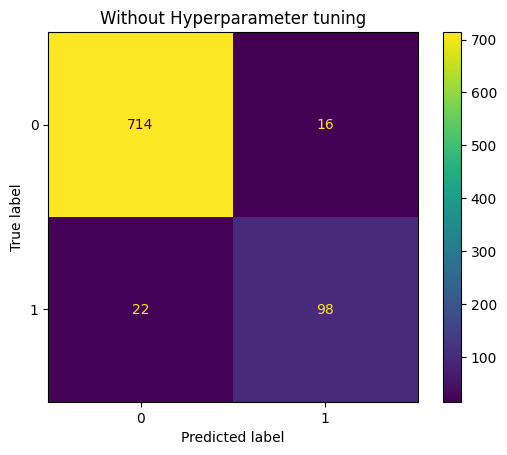

In [43]:
from sklearn.metrics import precision_score
#Check score after hyperparameter XGbooost
acc = metrics.accuracy_score(y_valid, y_pred_valid)
f1_score = metrics.f1_score(y_valid, y_pred_valid)
recall = metrics.recall_score(y_valid, y_pred_valid)
precis = metrics.precision_score(y_valid, y_pred_valid)
roc_auc = metrics.roc_auc_score(y_valid, y_pred_valid)

print(f'The accuracy score : {acc*100 : .2f}%')
print(f'The f1_score : {f1_score*100 : .2f}%')
print(f'The recall score: {recall*100 : .2f}%')
print(f'The precission score: {precis*100: .2f}%')
print(f'The ROC AUC score: {roc_auc: .2f}')



#plot Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_valid, y_pred_valid)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0', '1'])

cm_display.plot()
plt.title('Without Hyperparameter tuning')
plt.show()

In [44]:
clf.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'verbose': 0}

we can use hyperparamter tunning with Grid Search to improve machine learning algorithm. So we can predict on test dataset more accurate

In [45]:
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=44)


param_grid = {
    'num_leaves': [5, 20, 31],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'boosting_type': ['gbdt', 'rf']
}


ftwo_scorer = make_scorer(fbeta_score,
                          beta=2,
                          greater_is_better = True,
                          pos_label=1)

# Initialize the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(objective='binary',
                                    random_state=4, verbose=0)
# Initialize RandomSaearchCV for hyperparameters
best_clf = GridSearchCV(estimator=lgb_classifier, param_grid=param_grid,
                           scoring=ftwo_scorer, cv=skfold)

# Fit the model to the training data to search for the best hyperparameters
best_clf.fit(X_train_sm, y_train_sm)

# Get the best hyperparameters and their values
best_params = best_clf.best_params_
print(best_params)

{'boosting_type': 'gbdt', 'learning_rate': 0.2, 'n_estimators': 150, 'num_leaves': 31}


## Modelling after hyperparameter tunning
Input best parameter to new model LGBMClassifier

In [46]:
new_clf = lgb.LGBMClassifier(**best_params)
new_clf.fit(X_train_sm, y_train_sm)

[LightGBM] [Info] Number of positive: 2922, number of negative: 2922
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3826
[LightGBM] [Info] Number of data points in the train set: 5844, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(learning_rate=0.2, n_estimators=150)

In [47]:
#prediction using data valid
y_pred_valid_new = new_clf.predict(X_valid_s)

The accuracy score:  95.53%
The f1_score:  83.48%
The recall score:  80.00%
The precision score:  87.27%
The ROC AUC score:  0.89


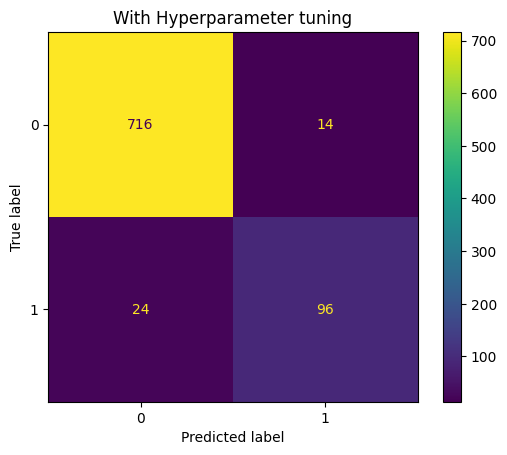

In [48]:
#Check score after hyperparameter
acc = metrics.accuracy_score(y_valid, y_pred_valid_new)
f1_score = metrics.f1_score(y_valid, y_pred_valid_new)
recall = metrics.recall_score(y_valid, y_pred_valid_new)
roc_auc = metrics.roc_auc_score(y_valid, y_pred_valid_new)
precision = metrics.precision_score(y_valid, y_pred_valid_new)

print(f'The accuracy score: {acc*100 : .2f}%')
print(f'The f1_score: {f1_score*100 : .2f}%')
print(f'The recall score: {recall*100 : .2f}%')
print(f'The precision score: {precision*100 : .2f}%')
print(f'The ROC AUC score: {roc_auc : .2f}')


#plot Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_valid, y_pred_valid_new)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0', '1'])

cm_display.plot()
plt.title('With Hyperparameter tuning')
plt.show()

After hyperparameter tunning with Grid Search, our algorithm much better. Precision score after hyperparameter tunning is higher than precision score before hyperparameter tunning from 85% to 87%. Machine learning classification not only notice on **accuracy** but precision score or recall score is important too. We can improve precision score or recall score depends on bussines strategy want to adjust. Usually machine learning classification want to reduce False prediction (False negative and false positive) so f1-score can be considered cause f1-score is relationship between precision and recall.

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       730
           1       0.87      0.80      0.83       120

    accuracy                           0.96       850
   macro avg       0.92      0.89      0.90       850
weighted avg       0.95      0.96      0.95       850


Feature Importance:


Text(0.5, 1.0, 'LGBM Classifier Feature Importance')

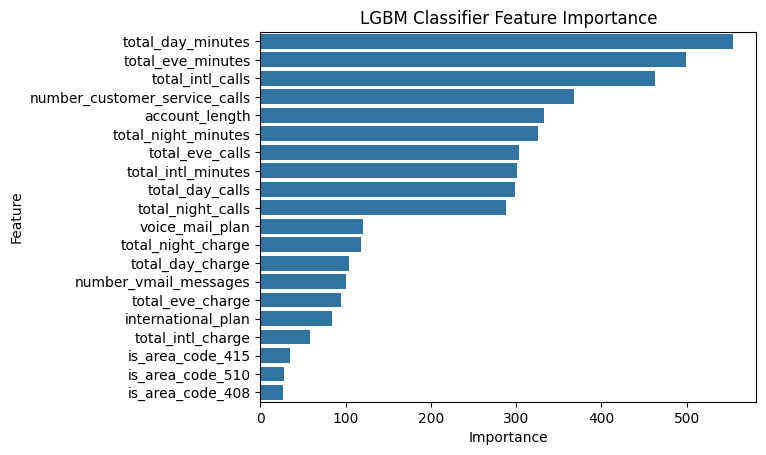

In [49]:
from sklearn.metrics import classification_report

# Classification Report
print("Classification Report:")
print(classification_report(y_valid, y_pred_valid_new))

# Feature Importance
print("\nFeature Importance:")
feature_df = pd.DataFrame({'Importance' : new_clf.feature_importances_, 'Features' : X_train.columns})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x='Importance', y='Features', data=feature_df)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("LGBM Classifier Feature Importance")


Total day minutes, total eve minutes, and total international calls are the most impotance to predict customer will churn or not. Therefore the company should focus on these features to reduce customer churn

# Predict to Data Test

After that we testing model to test dataset which is don't have class churn

In [50]:
#Predict to data test with missing feature churn
X_final_test = df_cl_test
X_final_test_s = norm.transform(X_final_test)

y_final_pred = new_clf.predict(X_final_test_s)

In [51]:
final_data_test = X_final_test.join(pd.DataFrame(y_final_pred))
final_data_test.head()

,is_area_code_408,is_area_code_415,is_area_code_510,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,0
0,0.00,1.00,0.00,128,0,1,25,265.10,110,45.07,...,99,16.78,244.70,91,11.01,10.00,3,2.70,1,0
1,0.00,0.00,1.00,118,1,0,0,223.40,98,37.98,...,101,18.75,203.90,118,9.18,6.30,6,1.70,0,0
2,0.00,1.00,0.00,62,0,0,0,120.70,70,20.52,...,76,26.11,203.00,99,9.14,13.10,6,3.54,4,1
3,0.00,0.00,1.00,93,0,0,0,190.70,114,32.42,...,111,18.55,129.60,121,5.83,8.10,3,2.19,3,0
4,0.00,1.00,0.00,174,0,0,0,124.30,76,21.13,...,112,23.55,250.70,115,11.28,15.50,5,4.19,3,0


In [52]:
# Label in class churn and add column id, state, area code
final_data_test.rename(columns={0: 'churn'}, inplace=True)
final_data_test['churn'] = final_data_test['churn'].replace({1: 'yes', 0: 'no'})
final_data_test['id'] = df_test['id']
final_data_test['state'] = df_test['state']
final_data_test['area_code'] = df_test['area_code']
final_data_test = final_data_test.drop(['is_area_code_408','is_area_code_415','is_area_code_510'], axis=1)


# Tampilkan lima baris pertama dari DataFrame final_data_test
final_data_test.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,id,state,area_code
0,128,0,1,25,265.10,110,45.07,197.40,99,16.78,...,91,11.01,10.00,3,2.70,1,no,1,KS,area_code_415
1,118,1,0,0,223.40,98,37.98,220.60,101,18.75,...,118,9.18,6.30,6,1.70,0,no,2,AL,area_code_510
2,62,0,0,0,120.70,70,20.52,307.20,76,26.11,...,99,9.14,13.10,6,3.54,4,yes,3,IA,area_code_415
3,93,0,0,0,190.70,114,32.42,218.20,111,18.55,...,121,5.83,8.10,3,2.19,3,no,4,VT,area_code_510
4,174,0,0,0,124.30,76,21.13,277.10,112,23.55,...,115,11.28,15.50,5,4.19,3,no,5,NE,area_code_415


In [53]:
final_data_test['churn'].value_counts()

churn
no     648
yes    102
Name: count, dtype: int64

## Percentage Churn

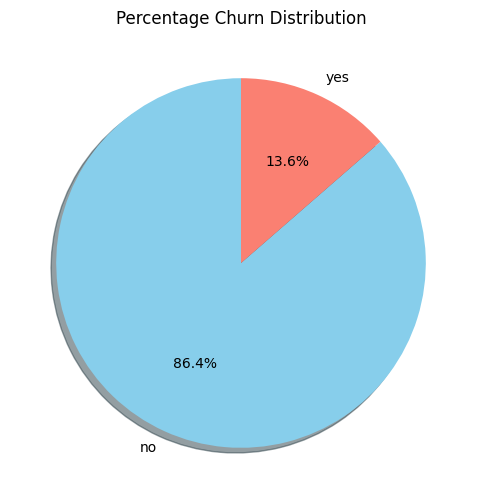

In [54]:
# Hitung jumlah churn dan non-churn
churn_counts = final_data_test['churn'].value_counts()
percent_churn = churn_counts / churn_counts.sum()

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(percent_churn, labels=percent_churn.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'], shadow=True, startangle=90)
plt.title('Percentage Churn Distribution')
# plt.axis('equal')  # Mengatur aspek persegi agar lingkaran menjadi lingkaran
plt.show()


Predicted results show that there are 13% customer churn. This results can be help Telco to make decission how to increase profit in the future

## Service and churn

<Axes: xlabel='voice_mail_plan', ylabel='count'>

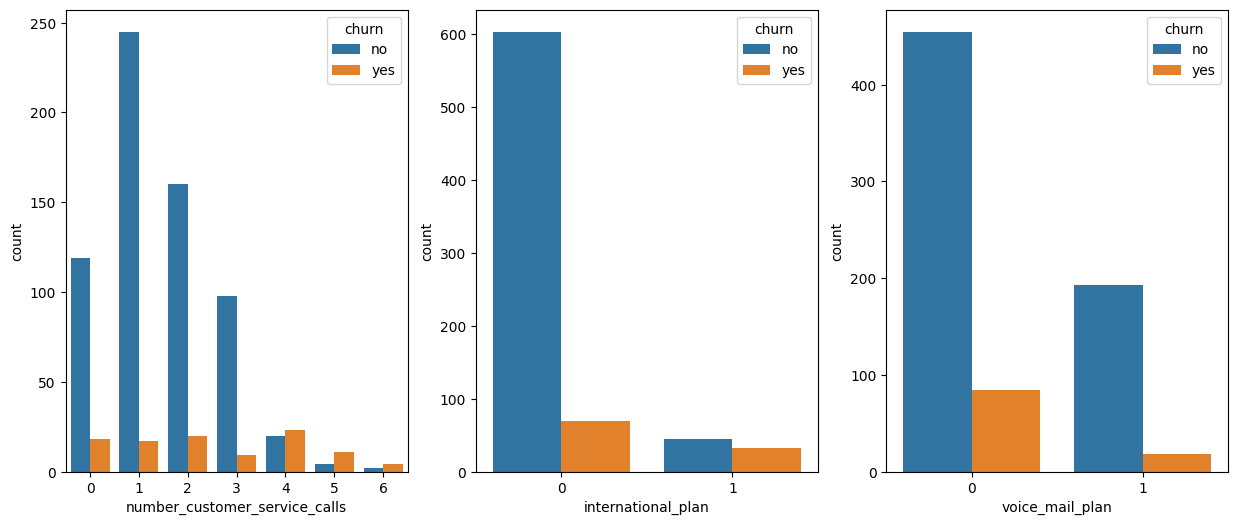

In [55]:
fig, axes = plt.subplots(figsize=(15,6), nrows=1, ncols=3, sharey=False)

sns.countplot(data=final_data_test, x="number_customer_service_calls", hue="churn", ax=axes[0])
sns.countplot(data=final_data_test, x="international_plan", hue="churn", ax=axes[1])
sns.countplot(data=final_data_test, x="voice_mail_plan", hue="churn", ax=axes[2])

## Area code and churn

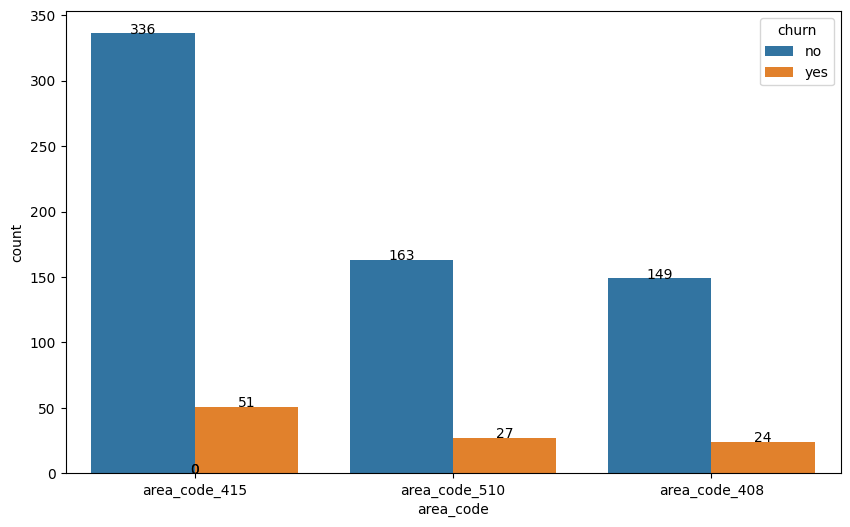

In [56]:
#display area code and churn
fig, ax1 = plt.subplots(figsize=(10, 6))
graph = sns.countplot(data=final_data_test, x='area_code', hue='churn')
for p in graph.patches:
    height = p.get_height()
    ax1.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height + 0.1), ha='center')

Predict result of data test that area code 415 has highest customer will churn with value of more than 50.

## State and churn

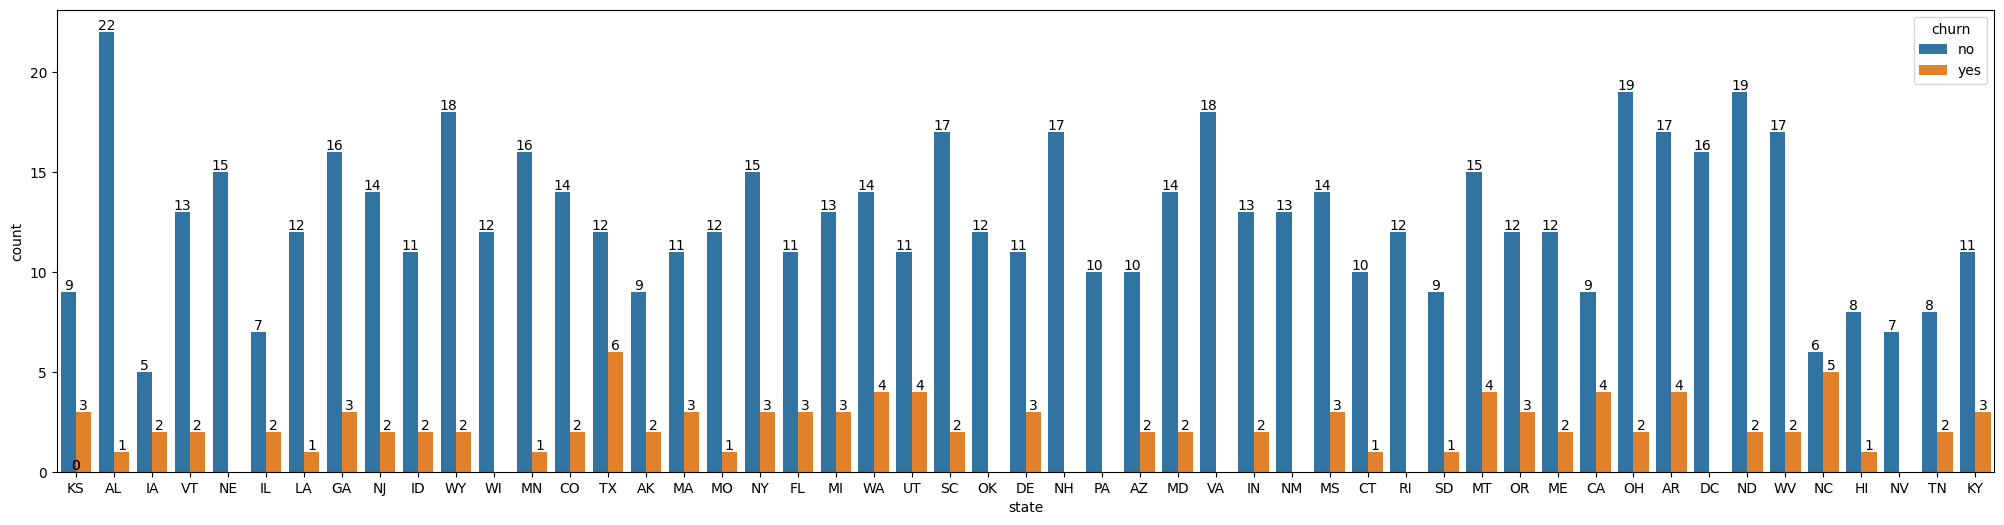

In [57]:
#display state and churn
fig, ax1 = plt.subplots(figsize=(25, 6))
graph = sns.countplot(data=final_data_test, x='state', hue='churn')
for p in graph.patches:
    height = p.get_height()
    ax1.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height + 0.1), ha='center')

On final data test, the states have the highest customer will churn are TX (Texas) with value of 6 and NC (North Carolina) with value of 5. It is can be considered by the company to focus on this states to prevent customer will churn

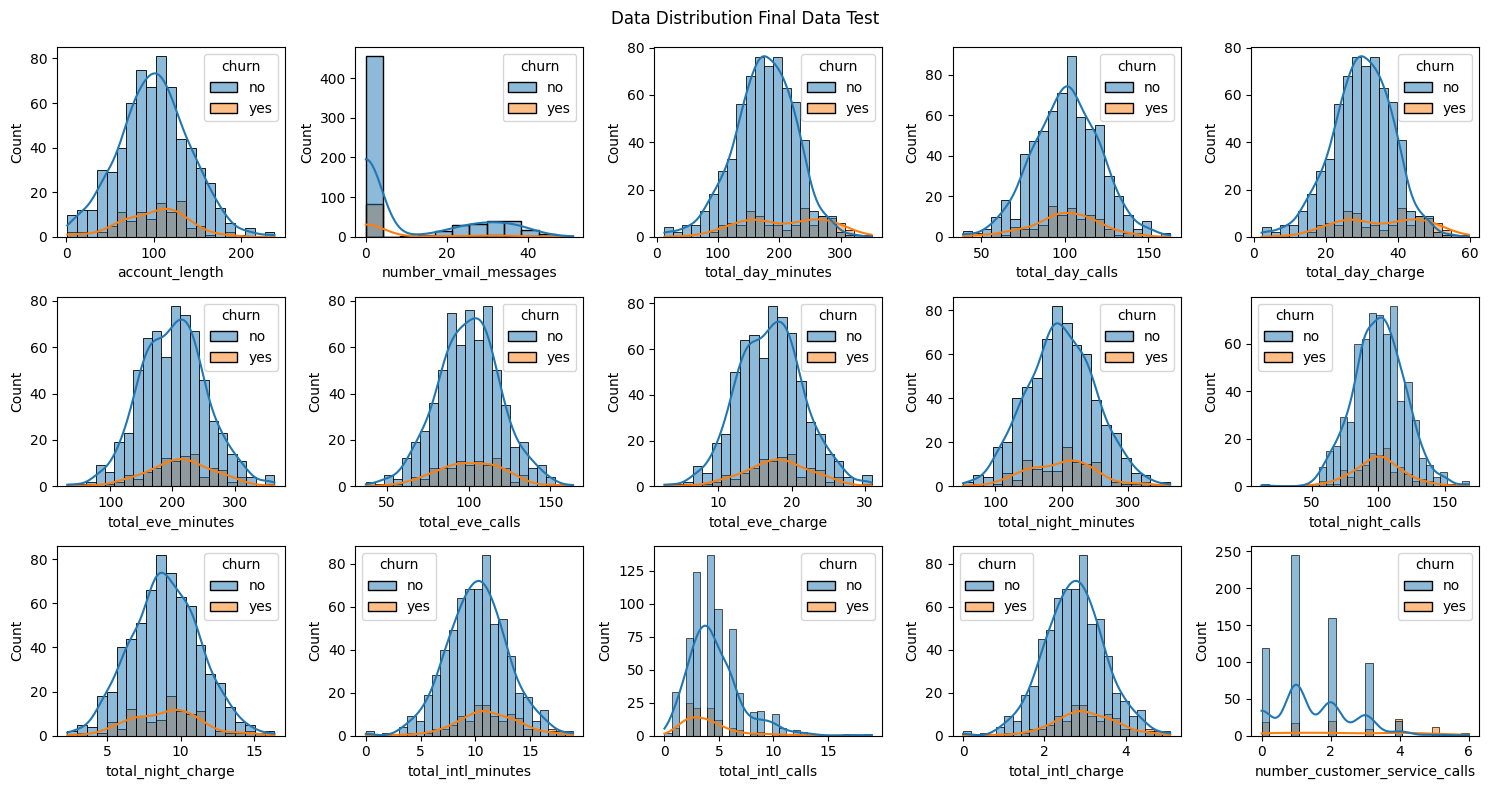

In [58]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical):
    plt.subplot(3, 5, i+1)
    sns.histplot(data=final_data_test, x=col, color='blue',hue='churn', kde=True)

plt.suptitle('Data Distribution Final Data Test')
plt.tight_layout()
plt.show()

# Conclusion
---
From Exploratory Data Analysis of Final data test, we know that area code 415 has the highest customer will churn of 51. The states have the highest customer churn are TX (Texas) and NC (North Carolina) i.e. 6 and 5.

Total day charge and total day minutes have an straight relationship churn count where total day charge and total day minutes increase then customer churn will increase too. It can be seen on correlation feaures and data visualization.

Customer use international plan mostly will churn than stay subscription with the company.

Coming to machine learning models, I have used lazypredict library to evaluate many machine learning models at once. LGBM Classifier has the highest accuracy i.e. 95% and f1-score i.e. 96%. So, LGBM Claasifier is a good fit to predict Customer Churn. I also have used hyperparameter tunning with GridSearch to find the best parameter for LGBM Classifier to predict Customer churn. As we can see that hyperparameter tunning can increase precision score and this is very useful. So we will be confidence with our models to predict Data Test with unseen label (Churn).

